## Plotting in python

There are several plotting packages available in python

* matplotlib - most detailed package, the original
* seaborn - an higher level package making prettier plots
* many others, e.g. bokeh, plottly, pygal

### Matplotlib

Made to mimic matlabs plotting functionality
Lets make some examples.


In [1]:
from matplotlib import pyplot as plt
from pylab import *

In [2]:
t=arange(.0,2.0,0.01)
s=sin(2*pi*t)
c=cos(2*pi*t)

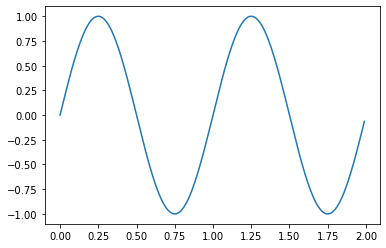

In [4]:
plt.plot(t,s)
plt.savefig("sin.png")

Text(0, 0.5, 'sin/cos')

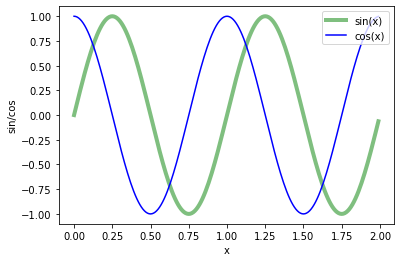

In [7]:
plt.plot(t,s,color="green",linewidth=4.0,linestyle="-",alpha=0.5,label="sin(x)")
plt.plot(t,c,color="blue",label="cos(x)")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("sin/cos")

## Histograms
There is functionality for histograms

<ipython-input-10-8f0847e41d03>:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = plt.hist(x,30,normed=1)


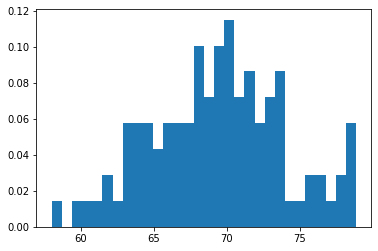

In [10]:
import numpy as np
mu,sigma = 70.,5.
x=mu+sigma*np.random.randn(100)
n, bins, patches = plt.hist(x,30,normed=1)

In [11]:
n

array([0.01438659, 0.        , 0.01438659, 0.01438659, 0.01438659,
       0.02877318, 0.01438659, 0.05754635, 0.05754635, 0.05754635,
       0.04315976, 0.05754635, 0.05754635, 0.05754635, 0.10070612,
       0.07193294, 0.10070612, 0.1150927 , 0.07193294, 0.08631953,
       0.05754635, 0.07193294, 0.08631953, 0.01438659, 0.01438659,
       0.02877318, 0.02877318, 0.01438659, 0.02877318, 0.05754635])

### Seaborn

Higher level functionality. Works in tandem with pandas.

In [13]:
import seaborn as sns

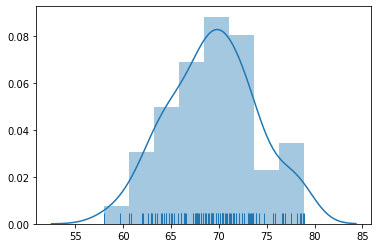

In [16]:
sns.distplot(x, rug=True, kde=True)

In [17]:
mean,cov = [0,1],[[1,.5],[.5,1]]
data = np.random.multivariate_normal(mean,cov,200)

In [19]:
import pandas as pd
df = pd.DataFrame(data,columns=["x","y"])
df

,x,y
0,0.650642,3.053196
1,-0.680539,0.504776
2,-1.135936,1.044187
3,-0.792675,0.750264
4,-2.596454,0.165816
...,...,...
195,0.834962,2.488632
196,1.104609,2.571583
197,0.528479,1.539149
198,0.569019,1.301337


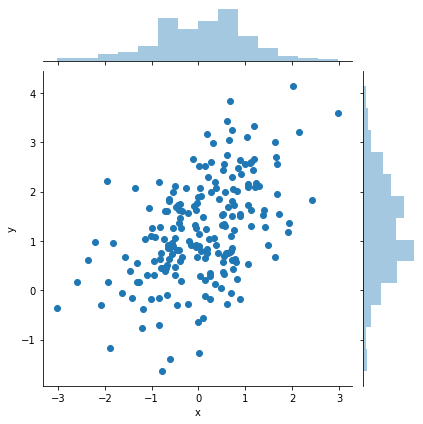

In [20]:
sns.jointplot(x="x", y="y", data=df)

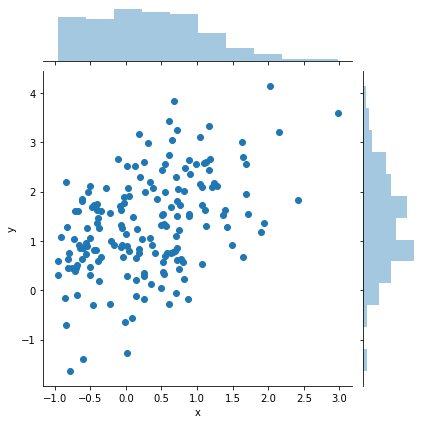

In [21]:
sns.jointplot(x="x",y="y",data=df[df["x"]>-1])

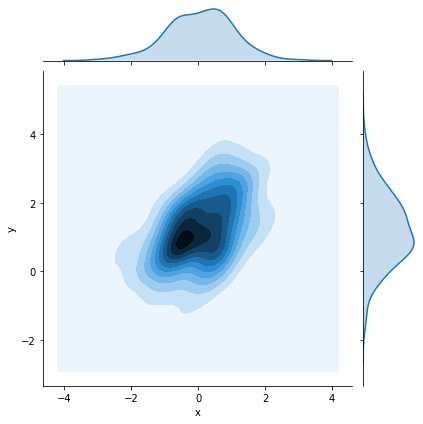

In [24]:
sns.jointplot(x="x",y="y",data=df, kind="kde")

In [26]:
faitful=sns.load_dataset("geyser")
faitful

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


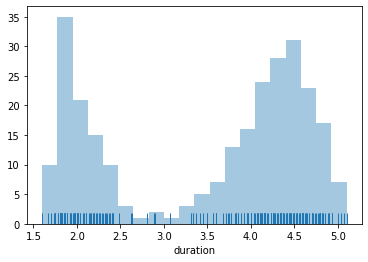

In [29]:
sns.distplot(faitful["duration"],rug=True,hist=True,kde=False,bins=20)

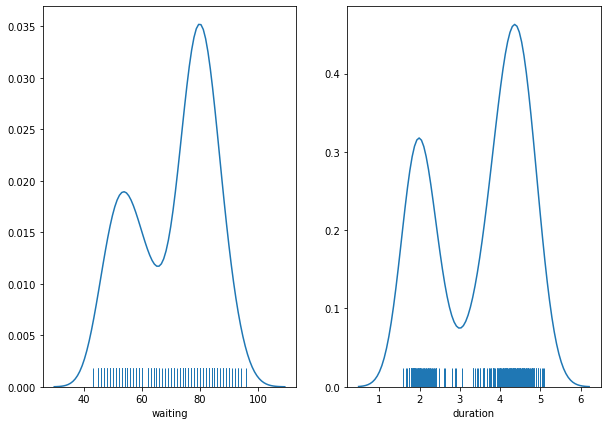

In [37]:
f, ax = plt.subplots(1,2,figsize=(10,7))
sns.distplot(faitful["duration"],rug=True,hist=False,bins=20,ax=ax[1])
sns.distplot(faitful["waiting"],rug=True,hist=False,bins=20,ax=ax[0])

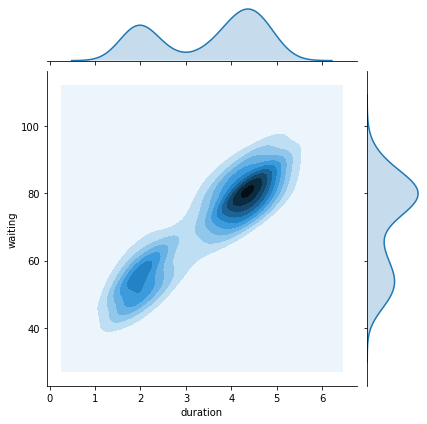

In [32]:
sns.jointplot(x="duration",y="waiting",kind="kde", data=faitful)

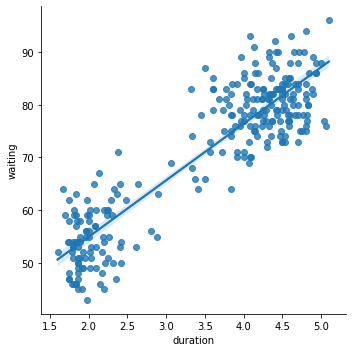

In [34]:
sns.lmplot(x="duration",y="waiting",data=faitful, fit_reg=True)

In [35]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


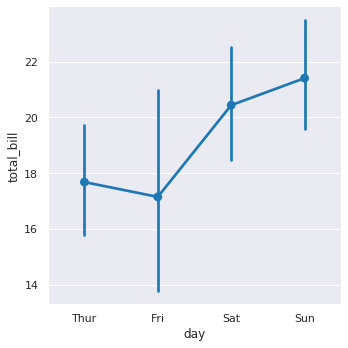

In [38]:
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.catplot(y="total_bill",x="day",kind="point",data=tips)

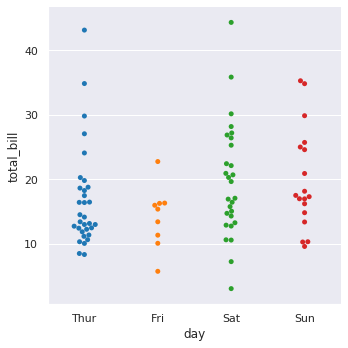

In [39]:
sns.catplot(y="total_bill",x="day",kind="swarm",data=tips[tips["sex"]=="Female"])

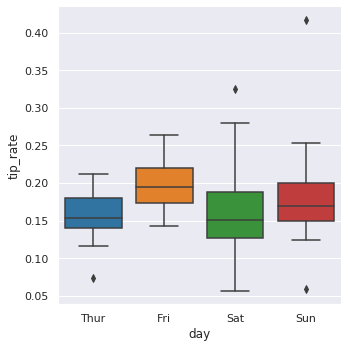

In [56]:
sns.catplot(y="tip_rate",x="day",kind="box",data=tips[tips["sex"]=="Female"])

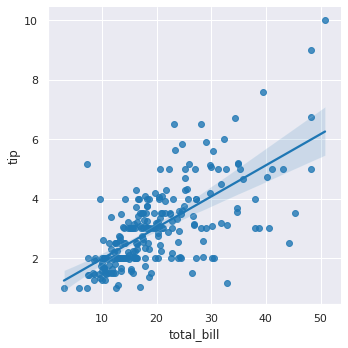

In [41]:
sns.lmplot(x="total_bill",y="tip",data=tips)

In [42]:
tips["tip_rate"]=tips["tip"]/tips["total_bill"]

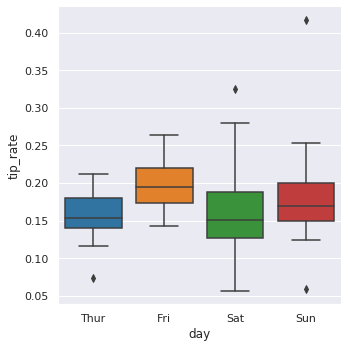

In [43]:
sns.catplot(y="tip_rate",x="day",kind="box",data=tips[tips["sex"]=="Female"])

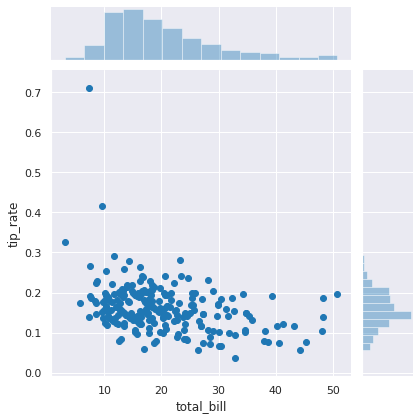

In [57]:
sns.jointplot(x="total_bill",y="tip_rate", data=tips)

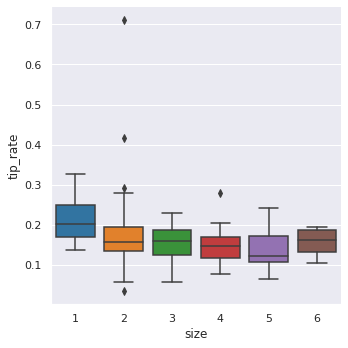

In [61]:
sns.catplot(y="tip_rate",x="size",kind="box",data=tips)

In [59]:
tips["tip_per_person"]=tips["tip"]/tips["size"]

In [44]:
ac=sns.load_dataset("anscombe")

In [45]:
ac

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82
